# 최근접이웃 (K-Nearest Neighbor)
- 순위를 사용하는 방법으로 가장 가까운 K개 이웃의 정보로 새로운 데이터를 예측하는 방법
    - 회귀 문제의 경우 종속 변수의 평균값으로 예측
    - 분류 문제의 경우 종속 변수의 과반 범주로 예측

- KNN은 거리 측정 방법에 따라 결과가 크게 달라짐
    - 거리를 계산하는 다양한 방법이 존재하며 일반적으로 유클리드 거리(Euclidean Distance)를 주로 사용

- KNN은 학습 데이터의 이상치 영향을 크게 받지 않으며 학습 데이터 수가 많다면 효과적인 알고리즘
    - 최근접 이웃(K)의 데이터만 사용하기 때문

- 데이터가 많은 경우 계산 시간이 오래 걸린다는 단점이 존재
    - 기준 데이터와 예측 데이터 사이의 거리를 전부 계산

# 최근접이웃 실습 (분류)

In [1]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier    # 분류 모델
from sklearn.neighbors import KNeighborsRegressor     # 회귀 모델 

In [2]:
# 분류 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/iris.csv')
df # Y값이 연속형인지, 범주형인지 확인 필요 (지금은 0, 1, 2로 범주형임)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 컬럼별 결측치 조회(결측치 있으면 없애야 하니까)
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
# 컬럼별 데이터 타입 조회 (계산해야되기 때문에 숫자값이어야 한다)
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [5]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# 3. 데이터 분할하기
X = df.iloc[:, :-1] # 마지막컬럼 빼고 다 가져오기
Y = df.iloc[:, -1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
Y # 범주형 > 분류 모델 사용

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [8]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0) # X. Y의 데이터 개수는 서로 일치해야 한다.
# 데이터 개수는 shape함수로도 확인할 수 있다.

In [10]:
# 모델 생성
model = KNeighborsClassifier(n_neighbors=5) # 최근접 이웃은 5로 설정

In [11]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

KNeighborsClassifier()

In [12]:
# 모델 평가
# 평가 시 분류에서는 정확도, 회귀에서는 R-Squred를 사용한다.
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9732142857142857
평가 데이터 성능 : 0.9736842105263158


In [13]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [14]:
# classification_report 계산
# 1이라고 예측한 값이 실제로는 2였다는 것을 볼 수 있다(1은 precision이 1.0인데 recall이 낮아서, 실제 참값중에 참으로 예측한 것이 1.0이 안되고 그것을 2로 예측했다는 것)
# 2의 precision을 보면 2로 예측한 것들 중에 참 긍정인 비율이 0.90이니까 위 해석이 맞물린다.
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# 최근접이웃 실습 (회귀)

In [15]:
# 회귀 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/boston.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,NaN,11.93,NaN,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,NaN,11.93,NaN,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,NaN,11.93,NaN,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,NaN,11.93,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
# 컬럼별 결측치 조회
# 506개의 행인데 절반 이상이 결측치가 존재하는 것을 볼 수 있음
df.isna().sum()

Unnamed: 0      0
CRIM            0
ZN            372
INDUS           0
CHAS          471
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
target          0
dtype: int64

In [17]:
# 컬럼별 데이터 타입 조회
df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
target        float64
dtype: object

In [18]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          134 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        35 non-null     float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  target      506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [19]:
# 결측치 처리하기 (0으로 처리)
# 행이나 열을 제거하기, 평균값 또는 중앙값으로 채우기 등 여러 방법이 있음 (어느 것이 무조건 좋다는 없음)
df['ZN'].fillna(0, inplace=True)
df['CHAS'].fillna(0, inplace=True)

In [20]:
# 3. 데이터 분할하기
features = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
]
X = df[features] # features에 있는 컬럼만 X로 가져올 수 있음
Y = df['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
Y # 연속형 > 회귀 모델 사용 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [22]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [23]:
# 모델 생성
model = KNeighborsRegressor(n_neighbors=5) # 최근접 이웃은 5로 설정

In [24]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

KNeighborsRegressor()

In [25]:
# 모델 평가 -> 회귀 모델이니 R-Squred로 평가됨
# 학습 데이터 성능이 평가 데이터 성능보다 월등히 좋다 -> 과대적합이 발생했다.
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.7066272660046313
평가 데이터 성능 : 0.4616380924610112


In [26]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([20.76, 29.54, 23.08, 11.94, 21.82, 21.4 , 22.96, 24.38, 30.24,
       18.26, 10.6 , 10.8 , 16.76, 10.38, 38.84, 25.34, 21.98, 23.44,
       24.32, 27.28, 23.56, 20.32, 19.02, 31.14, 21.16, 13.44, 18.48,
       22.46, 24.02, 17.4 , 16.04, 20.16, 19.68, 25.  , 24.6 , 19.04,
       10.38, 20.08, 13.44, 14.7 , 25.14, 21.16, 20.18, 19.04, 20.2 ,
       24.12, 23.26, 21.6 , 17.16, 20.04, 18.26, 22.3 , 28.14, 25.4 ,
       22.46, 22.46, 23.4 , 19.58, 10.  , 22.3 , 32.88, 20.72, 26.32,
       28.04, 22.52, 32.88, 19.04, 18.06, 13.9 , 29.34, 31.16, 21.82,
       24.72, 30.94, 22.52, 10.96, 32.1 , 22.84, 25.04, 20.46, 24.48,
       18.22, 16.38, 32.68, 28.02, 29.34, 23.8 , 12.7 , 32.24, 20.56,
       31.76, 13.44, 22.74, 25.02, 24.04, 22.62, 11.12, 25.06, 11.66,
       22.52, 29.42, 19.56, 26.5 , 28.04, 24.7 , 20.08, 12.02, 16.76,
       22.8 , 26.32, 32.24, 16.76, 18.06, 19.66, 16.86, 22.12, 10.96,
       17.86, 11.96, 41.6 , 32.88, 11.48, 28.06, 21.44, 22.1 , 19.04,
       29.42])

In [27]:
# rmse 계산
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, p_test, squared=False) # squred = False로 두어서 RMSE를 사용 (단위 그대로 사용 가능)
# 6632달러 정도의 오차를 가지는 것을 알 수 있다. 오차가 큰지 작은지는 스스로 판단해야 됨

6.632016118442083

# 최근접이웃 최적화 실습 
- K-Nearest Neighbor 모델에서 최근접 이웃(K)은 가장 중요한 Hyper Parameter
- 가장 좋은 K 값을 찾기 위한 미리 정의된 통계 또는 수학적 방법은 존재하지 않음
- 최적의 모델 성능을 내는 최근접 이웃을 찾는 방법을 주로 사용
    - 반복문을 이용하여 최근접 이웃 수를 변경하며 실험 진행
    - HyperParameter를 찾아주는 Tunner 이용 (GridSearch, RandomSearch, Optuna, …)


In [28]:
K_RANGE = range(1, 101) # 실험에 사용 할 범위 지정 (1 ~ 100까지 k를 변경하면서 수행해볼 것)

# 각 k별로 성능 지표를 저장할 리스트
TRAIN_SCORE = [] # 학습 데이터 성능 저장
TEST_SCORE = []  # 평가 데이터 성능 저장

for K in K_RANGE:
    model = KNeighborsRegressor(n_neighbors=K) # K값을 변경하면서 모델 생성
    model.fit(x_train, y_train) # 모델 학습
    
    TRAIN_SCORE.append(model.score(x_train, y_train)) # 학습데이터 성능
    TEST_SCORE.append(model.score(x_test, y_test))    # 평가데이터 성능

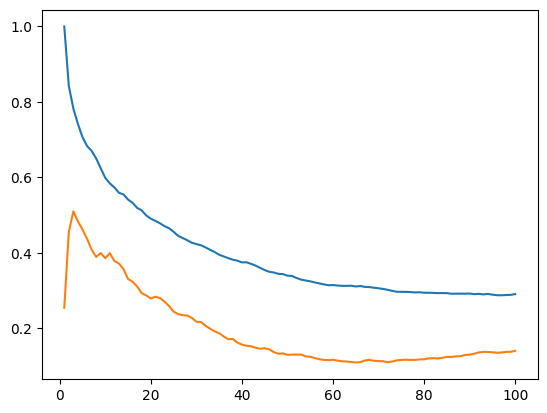

In [29]:
# 실험 결과 시각화
# k값이 커질수록 모델의 성능이 나빠지는 것을 볼 수 있다.
# 성능이 가장 좋을 때도 학습 데이터의 성능이 월등히 좋아서 과대적합이 발생했음을 시각적으로 알 수 있다.
plt.plot(K_RANGE, TRAIN_SCORE, label='Train R2')
plt.plot(K_RANGE, TEST_SCORE, label='Test R2')

## 제출

제출을 위해 새로 불러온 `iris.csv` 데이터를 통해 KNN 분류 모델을 만들고 학습한 이후 학습 데이터의 score와 테스트 데이터의 score를 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- KNN 모델의 이웃 개수는 **5개**로 설정합니다.

In [30]:
df = pd.read_csv('/mnt/elice/dataset/iris.csv')

# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=SEED)

# TODO: KNN 분류 모델을 만들고 학습합니다.
model = KNeighborsRegressor(n_neighbors = 5)

model.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

result = {
    "train": None,
    "test": None,
}

result['train']  = train_score
result['test'] = test_score

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [31]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 4.209 seconds
=== Message ===
제출 완료되었습니다.


0